In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
from datetime import datetime
import math 
plt.style.use('https://raw.githubusercontent.com/RobGeada/stylelibs/main/material_rh.mplstyle')

In [2]:
df = pd.read_pickle("level_LIME_results.pkl")
df.columns = ["metric_"+x if "dataset" not in x and "model" not in x and x!="explainer" else x for x in list(df)] 

In [3]:
df

,dataset,dataset_mu,dataset_rho,dataset_dim,dataset_noise,dataset_weight,dataset_num_train_samples,dataset_num_val_samples,model,explainer,metric_runtime,model_perf_train,model_perf_test,metric_metric_roar_faithfulness,metric_metric_roar_monotonicity,metric_metric_faithfulness,metric_metric_monotonicity,metric_metric_shapley,metric_metric_shapley_corr,metric_metric_infidelity
0,gaussianLinear,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.0,5,0.01,"[4, 3, 2, 1, 0]",1000,100,lr,limetrustyai_mlp,72.149186,0.00,0.02,-0.005589,0.4425,-0.102435,0.3700,0.510360,-0.016587,0.109946
1,gaussianLinear,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.0,5,0.01,"[4, 3, 2, 1, 0]",1000,100,lr,limetrustyai_wlr,4.474847,0.00,0.02,-0.003224,0.4375,-0.104135,0.3550,0.511851,-0.015450,0.111732
2,gaussianLinear,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.0,5,0.01,"[4, 3, 2, 1, 0]",1000,100,lr,lime,9.969065,0.00,0.02,0.432974,0.7225,0.723343,0.3875,0.506069,0.072333,0.012311
3,gaussianLinear,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.0,5,0.01,"[4, 3, 2, 1, 0]",1000,100,lr,random,0.000238,0.00,0.02,0.013550,0.5150,0.019622,0.4425,1.176401,0.032958,0.182505
4,gaussianLinear,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.0,5,0.01,"[4, 3, 2, 1, 0]",1000,100,dtree,limetrustyai_mlp,78.063248,0.00,0.10,0.000656,0.4625,-0.082990,0.3350,0.525671,-0.038704,0.154969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,gaussianPiecewiseConstant,"[0.0, 0.0, 0.0, 0.0, 0.0]",1.0,5,0.01,"[4, 3, 2, 1, 0]",1000,100,dtree,random,0.000196,0.00,0.05,0.000000,0.7500,0.000000,0.7500,1.033825,0.033027,0.420734
176,gaussianPiecewiseConstant,"[0.0, 0.0, 0.0, 0.0, 0.0]",1.0,5,0.01,"[4, 3, 2, 1, 0]",1000,100,mlp,limetrustyai_mlp,538.072181,0.07,0.11,-0.024000,0.2900,0.049445,0.3200,0.297754,-0.023979,0.010515
177,gaussianPiecewiseConstant,"[0.0, 0.0, 0.0, 0.0, 0.0]",1.0,5,0.01,"[4, 3, 2, 1, 0]",1000,100,mlp,limetrustyai_wlr,9.634150,0.07,0.11,0.184256,0.4100,0.025502,0.3275,0.294544,-0.026225,0.010090
178,gaussianPiecewiseConstant,"[0.0, 0.0, 0.0, 0.0, 0.0]",1.0,5,0.01,"[4, 3, 2, 1, 0]",1000,100,mlp,lime,10.434439,0.07,0.11,0.028801,0.3750,-0.065831,0.3125,0.031670,-0.021633,0.011367


In [4]:
metrics = [x for x in list(df) if "metric" in x]
metric_down = ["metric_infidelity", "metric_runtime", "metric_shapley"]
metric_labels = {metric:metric +" ↓" if metric in metric_down else metric +" ↑" for metric in metrics}
metric_labels

{'metric_runtime': 'metric_runtime ↓',
 'metric_metric_roar_faithfulness': 'metric_metric_roar_faithfulness ↑',
 'metric_metric_roar_monotonicity': 'metric_metric_roar_monotonicity ↑',
 'metric_metric_faithfulness': 'metric_metric_faithfulness ↑',
 'metric_metric_monotonicity': 'metric_metric_monotonicity ↑',
 'metric_metric_shapley': 'metric_metric_shapley ↑',
 'metric_metric_shapley_corr': 'metric_metric_shapley_corr ↑',
 'metric_metric_infidelity': 'metric_metric_infidelity ↑'}

In [5]:
# automatically choose subplot dimensions
def auto_plot_count(n):
    pairs = []
    for i in range(1,n+1):
        j = math.ceil(n/i)
        remainder = (i*j) - n
        dist = np.abs(i-j)
        pairs.append((i,j,2*remainder+dist))
    return sorted(pairs, key=lambda x: (x[2]))[0][0:2]

subplots = auto_plot_count(len(metrics))
subplots

(2, 4)

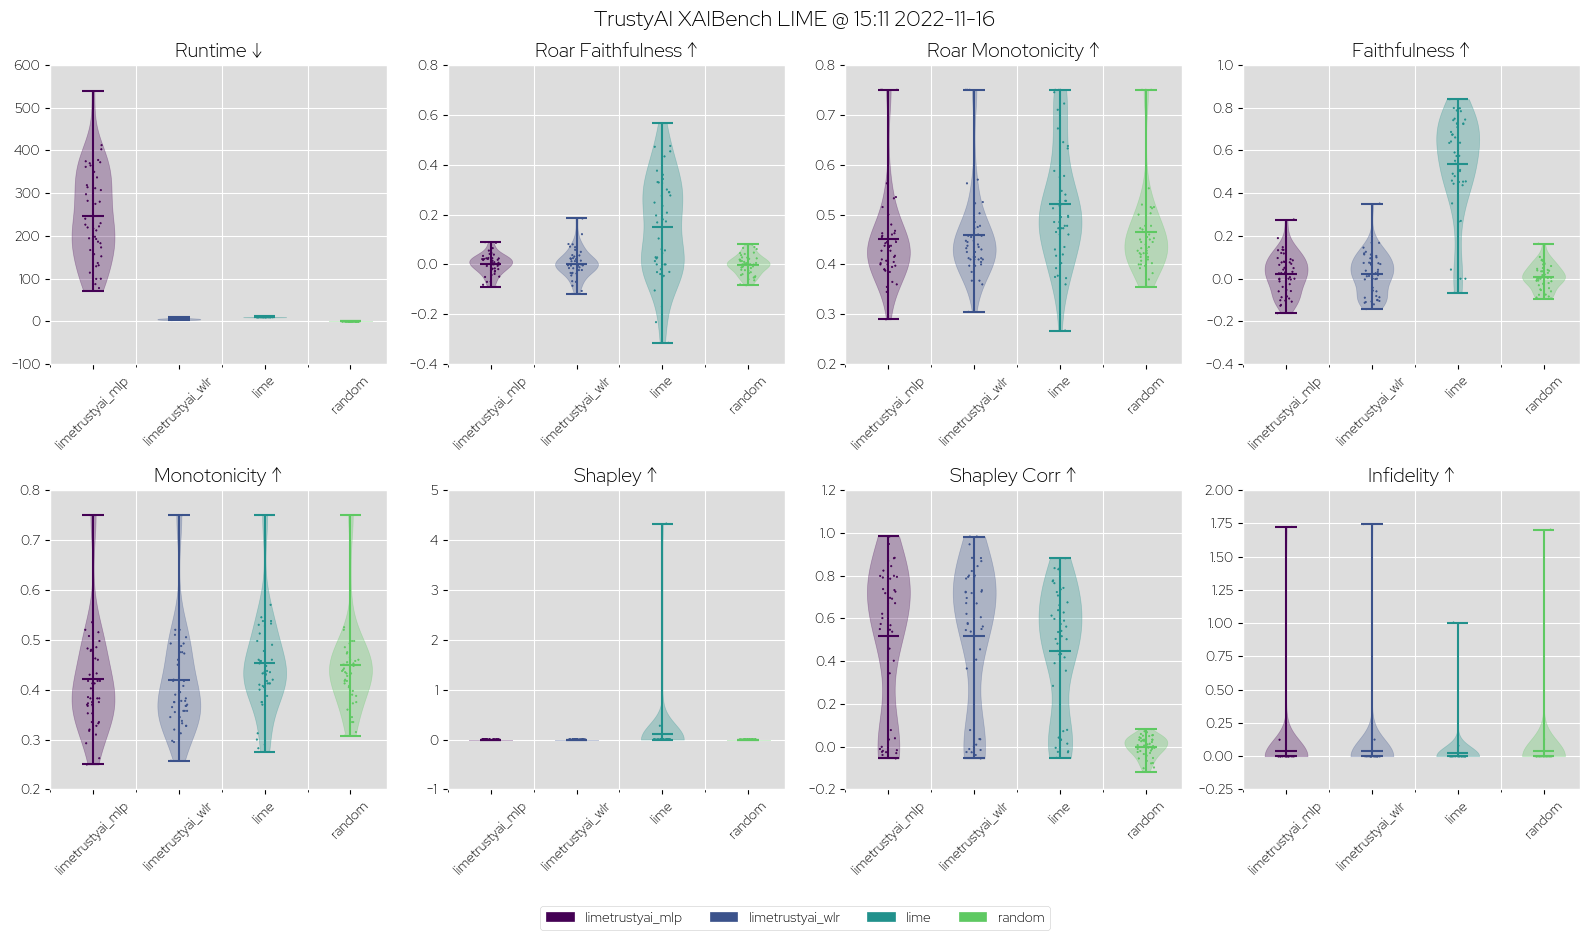

In [9]:
level="LIME"
cmap = mpl.colormaps['viridis']
explainers = df['explainer'].unique()
n_exp = len(explainers)
   
fig = plt.figure(figsize=(16,9))
labels = []
colors = []
for metric_idx, metric in enumerate(metrics):
    for exp_idx, explainer in enumerate(explainers):
        exp_df = df[df['explainer']==explainer]
        color = cmap(exp_idx/n_exp)
        n_datasets = len(exp_df)
        plt.subplot(subplots[0], subplots[1], metric_idx+1)
        
        xs = []
        ys = []
        for idx,(_, row) in enumerate(exp_df.iterrows()):
            xs.append(exp_idx)
            ys.append(row[metric])
        plt.scatter(xs+((np.random.rand(len(xs))-.5)/5)+.5, ys, c=[color]*len(xs), s=1)
        violin_parts = plt.violinplot(ys, positions=[exp_idx+.5], showmeans=True)
        if metric_idx == 0:
            labels.append([mpatches.Patch(color=color), explainer])
        
        for partname in ('cbars','cmins','cmaxes','cmeans'):
            violin_parts[partname].set_color(color)
        for v_idx, pc in enumerate(violin_parts['bodies']):
            pc.set_facecolor(color)
            pc.set_edgecolor(color)
        colors.append(cmap(exp_idx/n_exp))
    
    ax = plt.gca()
    locs = np.arange(n_exp)
    
    ax.xaxis.set_ticks(locs, minor=True)
    ax.yaxis.set_ticks(np.array(plt.yticks()[0]), minor=True)

    ax.xaxis.set(ticks=locs+.5, ticklabels=explainers)
    ax.yaxis.set(ticks=np.array(plt.yticks()[0]), ticklabels=plt.yticks()[1])
    ax.grid(True, which='minor',axis='x')
    ax.grid(False, which='major',axis='x')
    plt.xticks(rotation=45)
    plt.title(metric_labels[metric].replace("metric_","").replace("_"," ").title())

plt.suptitle("TrustyAI XAIBench {} @ {}".format(level, datetime.strftime(datetime.now(), "%H:%m %Y-%m-%d")), color='k', fontsize=16)
plt.tight_layout()
fig.legend(*zip(*labels), loc='lower center', bbox_to_anchor=(.5, -.05),ncols=5)
plt.savefig("xai_bench_l{}.png".format(level),bbox_inches='tight')
plt.show()